In [1]:
options(warn = -1)
suppressPackageStartupMessages({
  library(tidyverse)
  library(tidyquant)
  library(stochvol)
  })

In [2]:
acao <- "^BVSP"
retornos <- tq_get(acao, from = "2000-01-01") %>%
  tq_transmute(select = adjusted, mutate_fun = dailyReturn)

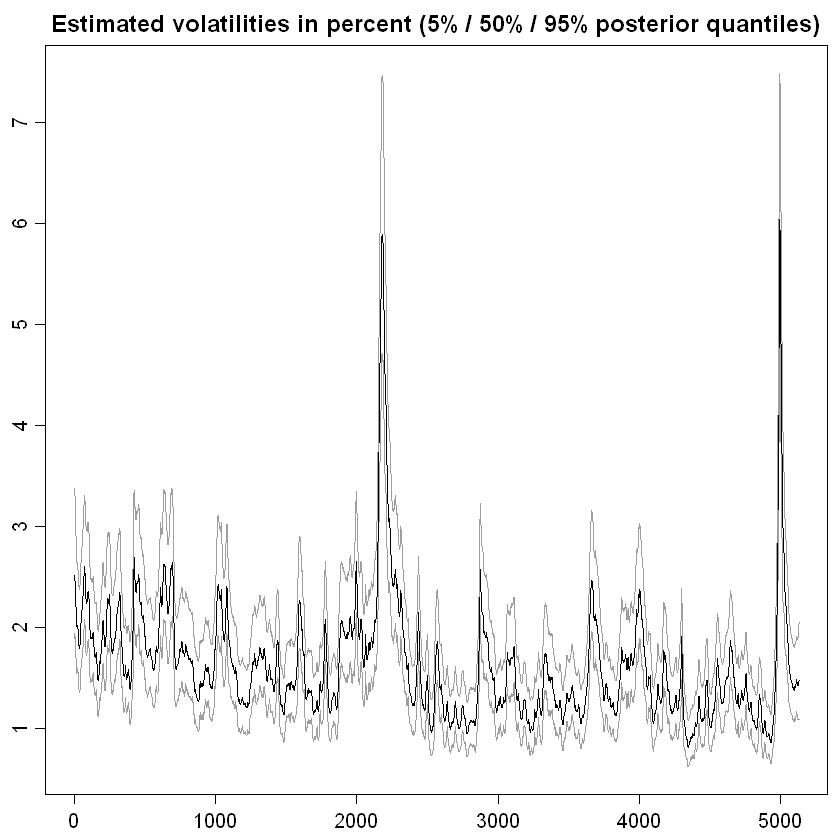

In [3]:
volatilidade <- svsample(retornos$daily.returns)
volplot(volatilidade)

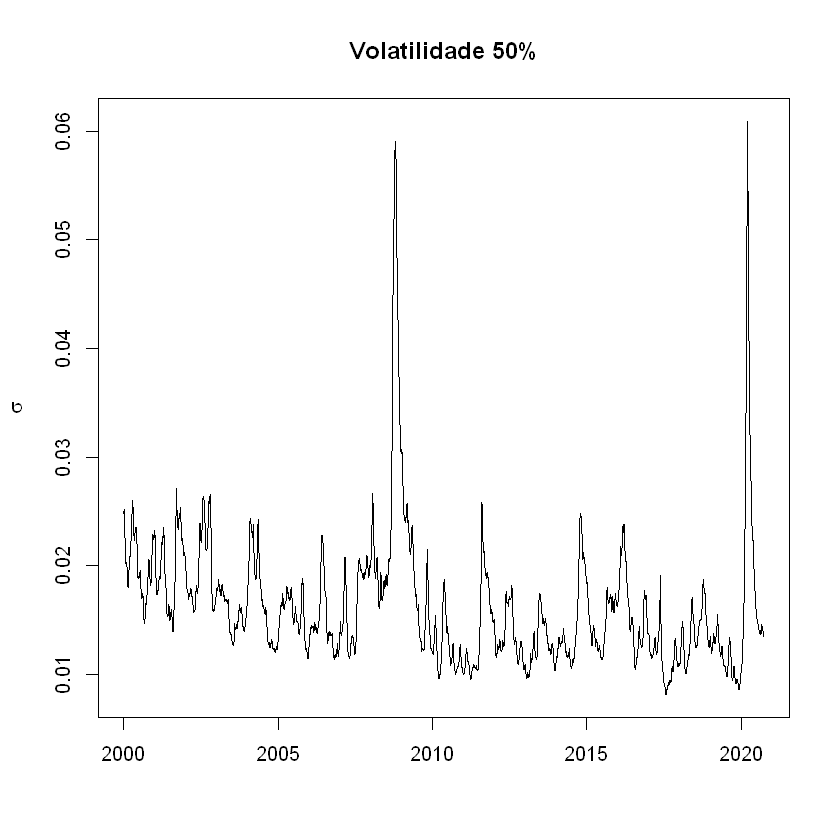

In [10]:
vol50 <- exp(volatilidade$summary$latent[,4,drop = F]/2)
plot(retornos$date,vol50, type = "l",xlab = "", ylab = expression(sigma),
     main = "Volatilidade 50%")

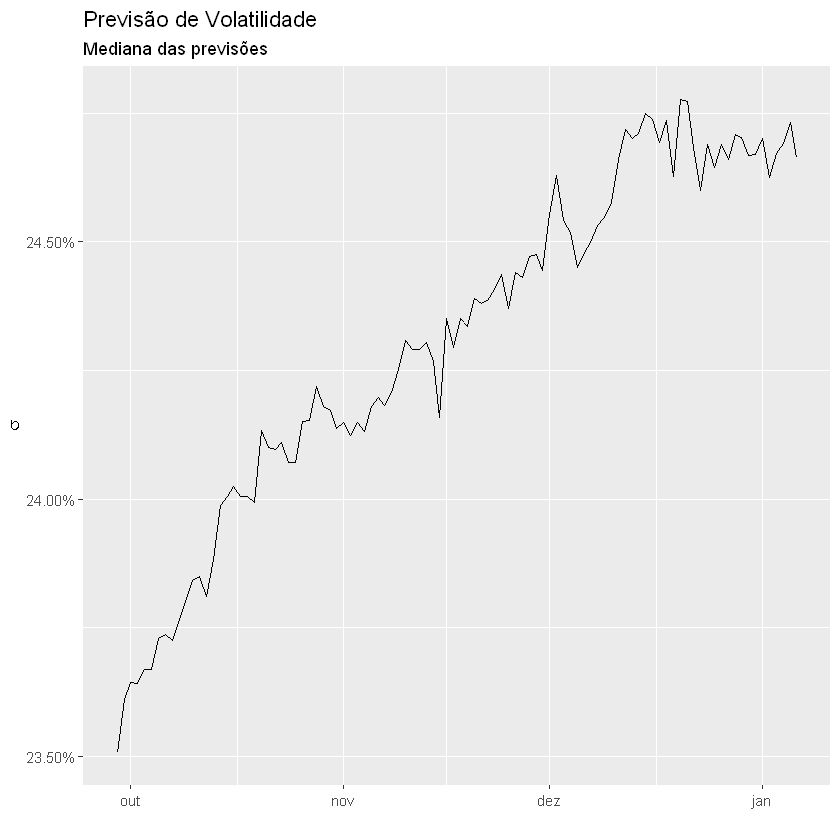

In [7]:
#Previsão
dias_pre <- 100
pre <- predict(volatilidade, dias_pre)
quantia <- apply(pre$h,2,quantile, prob = 0.5)
vol_pre <- exp(quantia/2)
datas <- xts::last(retornos$date)+1:dias_pre

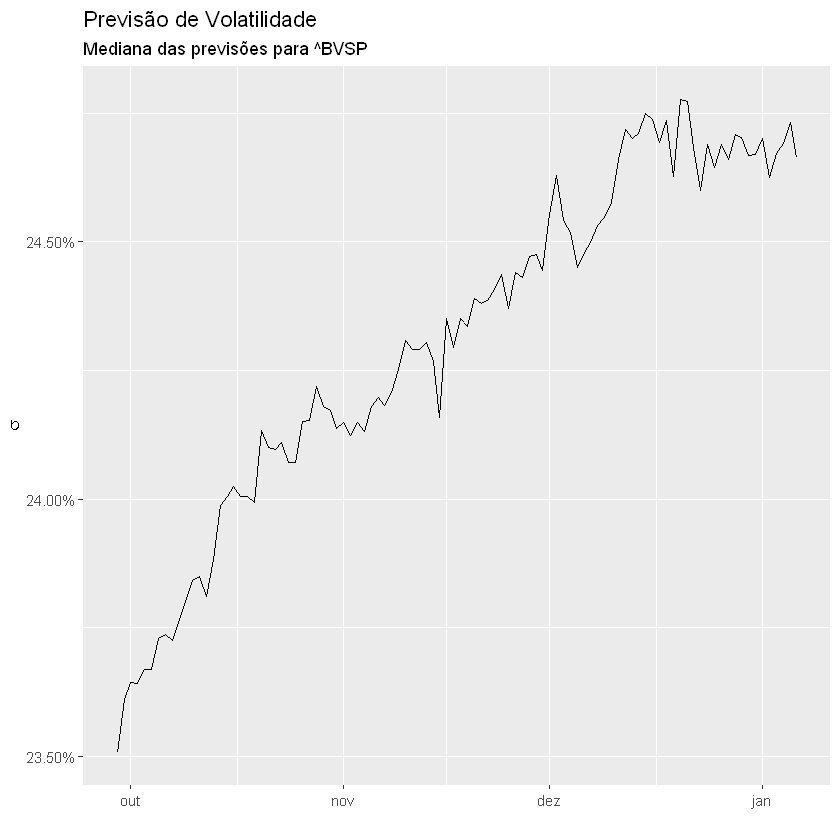

In [8]:
data <- data.frame(date = datas, vol = vol_pre)
ggplot(data, aes(x = date, y = vol*sqrt(252)))+
  geom_line()+
  labs(x = "", y = expression(sigma),
       title = "Previsão de Volatilidade",
       subtitle = paste("Mediana das previsões para",acao))+
  scale_y_continuous(labels = scales::percent)